# Two Wheeled Motion Model
A motion model is defined by two vectors: its state $\mathbf{x}$, and its control actions $\mathbf{u}$.

For a two-wheeled robot on a plane such as the TurtleBot, the state can be modelled as its coordinate on the plane and its orientation. As a vector this is $\mathbf{x} = \begin{bmatrix}x & y & \psi \end{bmatrix} ^ T$. Its control actions or inputs are its velocity forward and its angular rotation. In vector notation, $\mathbf{u} = \begin{bmatrix}v & \omega \end{bmatrix} ^ T$.

From geometry, we can derive the update step
$$
\begin{align*}
\mathbf{x}_t
&=
\begin{bmatrix}
x_{1,t}\\
x_{2,t}\\
x_{3,t}
\end{bmatrix}\\
&=
f(\mathbf{x}_{t-1}, \mathbf{u}_t)\\
&=
\begin{bmatrix}
x_{1, t-1} + u_{1,t} \cos{x_{3, t-1}} dt\\
x_{2, t-1} + u_{2,t} \sin{x_{3, t-1}} dt\\
x_{3, t-1} + u_{2,t}dt
\end{bmatrix}
\end{align*}
$$

Since there is inherent uncertainty due to wheel slip and faulty sensors, we can model the error $\varepsilon_t$ as a probability distribution. In the example below, this probability distribution will be a Gaussian.

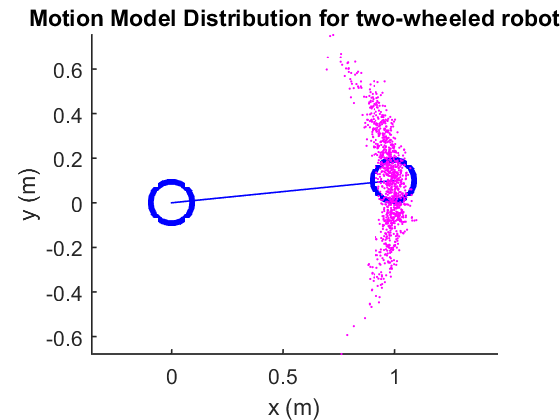

In [2]:
%% Two-wheeled robot motion model
dt = 1; % Timestep
x0 = [0 0 0.1]'; % Initial State
speed = 1; % Speed
heading_rate = 0.1; % Heading rate of change

% Noise Model (speed and heading)
noise_model = [0.001 0; 0 0.05];
[noise_model_eigenvectors, noise_model_eigenvalues] = eig (noise_model);

num_samples=1000;
for i=1:num_samples
    % Disturbance
    E = noise_model_eigenvectors * sqrt(noise_model_eigenvalues) * randn(2,1);
    % Dynamics
%% Two-wheeled robot motion model
dt = 1; % Timestep
x0 = [0 0 0.1]'; % Initial State
speed = 1; % Speed
heading_rate = 0.1; % Heading rate of change

% Noise Model (speed and heading)
noise_model = [0.001 0; 0 0.05];
[noise_model_eigenvectors, noise_model_eigenvalues] = eig (noise_model);

num_samples=1000; % Samples
for i=1:num_samples
    % Disturbance
    disturbance = noise_model_eigenvectors * sqrt(noise_model_eigenvalues) * randn(2,1);
    % Dynamics
     x(:,i) = x0 + [ dt*(speed+disturbance(1))*cos(x0(3)+disturbance(2));  
                     dt*(speed+disturbance(1))*sin(x0(3)+disturbance(2)); 
                     disturbance(2)+ dt*heading_rate];
end
% Disturbance free dynamics
x1 = x0 + [ dt * speed * cos(x0(3));  
            dt*speed*sin(x0(3)); 
            dt*heading_rate];

% Plot
figure(1); clf; hold on;
plot( x0(1), x0(2), 'bo', 'MarkerSize',20, 'LineWidth', 3)
plot( x1(1), x1(2), 'bo', 'MarkerSize',20, 'LineWidth', 3)
plot( [x0(1) x1(1)], [x0(2) x1(2)],'b')
plot( x(1,:),x(2,:), 'm.', 'MarkerSize', 3)
title('Motion Model Distribution for two-wheeled robot')
xlabel('x (m)');
ylabel('y (m)');
axis equal
end
% Disturbance free dynamics
x1 = x0 + [ dt * speed * cos(x0(3));  
            dt*speed*sin(x0(3)); 
            dt*heading_rate];

% Plot
figure(1); clf; hold on;
plot( x0(1), x0(2), 'bo', 'MarkerSize',20, 'LineWidth', 3)
plot( x1(1), x1(2), 'bo', 'MarkerSize',20, 'LineWidth', 3)
plot( [x0(1) x1(1)], [x0(2) x1(2)],'b')
plot( x(1,:),x(2,:), 'm.', 'MarkerSize', 3)
title('Motion Model Distribution for two-wheeled robot')
xlabel('x (m)');
ylabel('y (m)');
axis equal

The blue circle on the left shows the robot's initial position, and the blue line indicates its location given that its motion were free from disturbances. Given disturbances from the noise model in the variable `noise_model` representing error in its velocity and heading rate of change, the robot's true location could be any of the pink dots.

In this choice for noise model, we have a relatively high error for the robot's angular velocity leading to 